In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

%matplotlib inline

In [36]:
data = pd.read_csv("pass_data.csv")

data.head()

,team,half,min,x_origin,y_origin,x_destination,y_destination,outcome
0,Silkeborg IF,1,0,52.500,33.932,49.665,34.340,1
1,Silkeborg IF,1,0,49.560,33.932,44.520,24.480,1
2,Silkeborg IF,1,0,44.100,19.584,47.250,2.924,1
3,Silkeborg IF,1,0,42.000,5.100,26.775,14.688,1
4,Silkeborg IF,1,0,23.835,17.068,8.190,32.164,1


In [37]:
#Filter 1

dataF = data[
    (data.team == 'FC København') &
    (data.index >= 75) &
    (data.index <= 79)
]

print(dataF)

            team  half  min  x_origin  y_origin  x_destination  y_destination  \
75  FC København     1    5    56.700    23.052         78.015         16.320   
76  FC København     1    5    78.015    16.524         69.720         23.324   
77  FC København     1    5    69.825    24.548         71.400         36.720   
78  FC København     1    5    71.400    38.352         97.545         47.804   
79  FC København     1    5   100.170    55.080        100.380         37.400   

    outcome  
75        1  
76        1  
77        1  
78        1  
79        1  


In [38]:
#CHOOSE WHAT DATA IS
data = dataF
data = data.reset_index()
data.head()
print(data)

   index          team  half  min  x_origin  y_origin  x_destination  \
0     75  FC København     1    5    56.700    23.052         78.015   
1     76  FC København     1    5    78.015    16.524         69.720   
2     77  FC København     1    5    69.825    24.548         71.400   
3     78  FC København     1    5    71.400    38.352         97.545   
4     79  FC København     1    5   100.170    55.080        100.380   

   y_destination  outcome  
0         16.320        1  
1         23.324        1  
2         36.720        1  
3         47.804        1  
4         37.400        1  


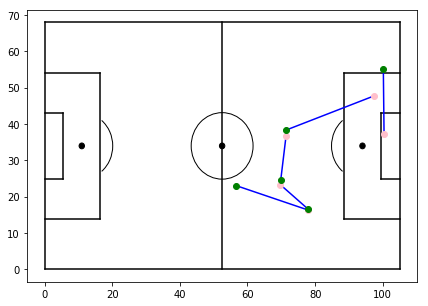

In [39]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,68], color="black")
plt.plot([0,105],[68,68], color="black")
plt.plot([105,105],[68,0], color="black")
plt.plot([105,0],[0,0], color="black")
plt.plot([52.5,52.5],[0,68], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[13.85,54.15],color="black")
plt.plot([0,16.5],[13.85,13.85],color="black")
plt.plot([16.5,0],[54.15,54.15],color="black")

#Right Penalty Area
plt.plot([88.5,88.5],[13.85,54.15],color="black")
plt.plot([105,88.5],[13.85,13.85],color="black")
plt.plot([88.5,105],[54.15,54.15],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[43.15,43.15],color="black")
plt.plot([5.5,5.5],[24.85,43.15],color="black")
plt.plot([0,5.5],[24.85,24.85],color="black")

#Right 6-yard Box
plt.plot([105,99.5],[43.15,43.15],color="black")
plt.plot([99.5,99.5],[24.85,43.15],color="black")
plt.plot([99.5,105],[24.85,24.85],color="black")

#Prepare Circles
centreCircle = plt.Circle((52.5,34),9.15,color="black",fill=False)
centreSpot = plt.Circle((52.5,34),0.8,color="black")
leftPenSpot = plt.Circle((11,34),0.8,color="black")
rightPenSpot = plt.Circle((94,34),0.8,color="black")

#Plot point
SpotDestination = plt.Circle((88.935,20.196),0.8,color="pink")
SpotOrigin = plt.Circle((92.61,8.908),0.8,color="pink")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)
#ax.add_patch(SpotDestination)
#ax.add_patch(SpotOrigin)

#Prepare Arcs
leftArc = Arc((11,34),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((94,34),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Pass Data
for i in range(len(data)):
    plt.plot([(data["x_origin"][i]),(data["x_destination"][i])],
             [(data["y_origin"][i]),(data["y_destination"][i])], 
             color="blue")
    
    plt.plot((data["x_origin"][i]),(data["y_origin"][i]),"o", color="green")
    plt.plot((data["x_destination"][i]),(data["y_destination"][i]),"o", color="pink")
    
#Tidy Axes
plt.axis('on')

#Display Pitch
plt.show()